<a href="https://colab.research.google.com/github/minurasam/CS408/blob/main/Scale_Invariant_Feature_Transform_(SIFT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python==4.5.3.56

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2
cv2.__version__

'4.5.3'

#Keypoint Descriptor

In [6]:
import numpy as np
import cv2 as cv

img = cv.imread('/content/drive/MyDrive/CS408_Images/Eiffel_Tower.jpg')
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray,None)

img=cv.drawKeypoints(gray,kp,img)

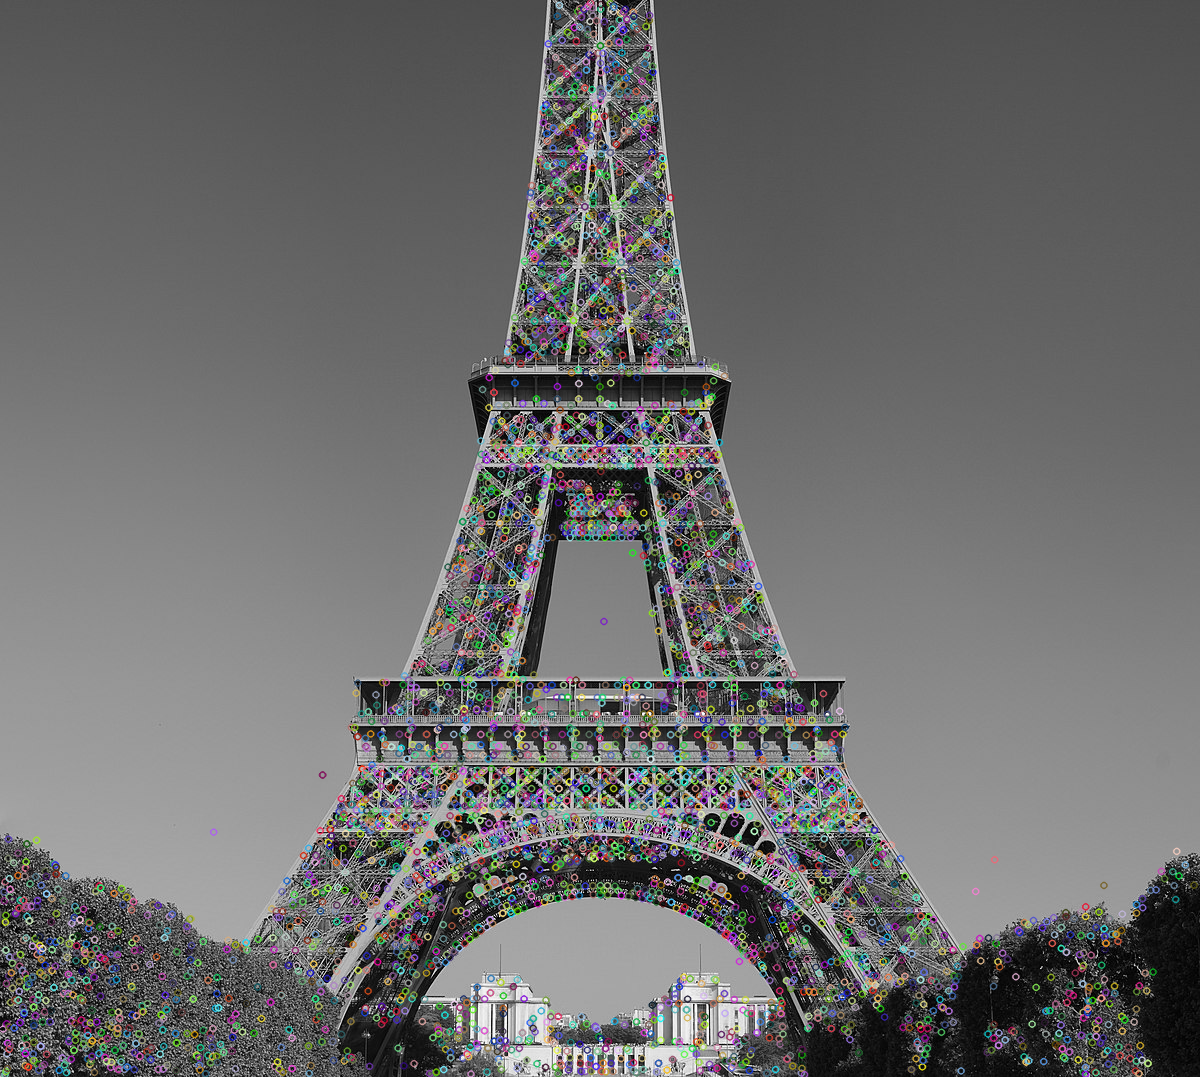

In [7]:
cv2_imshow(img)

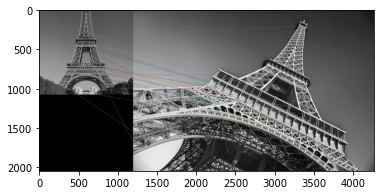

(<matplotlib.image.AxesImage at 0x7ff4aa605890>, None)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/drive/MyDrive/CS408_Images/Eiffel_Tower.jpg')  
img2 = cv2.imread('/content/drive/MyDrive/CS408_Images/eiffel-tower-ground-up.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

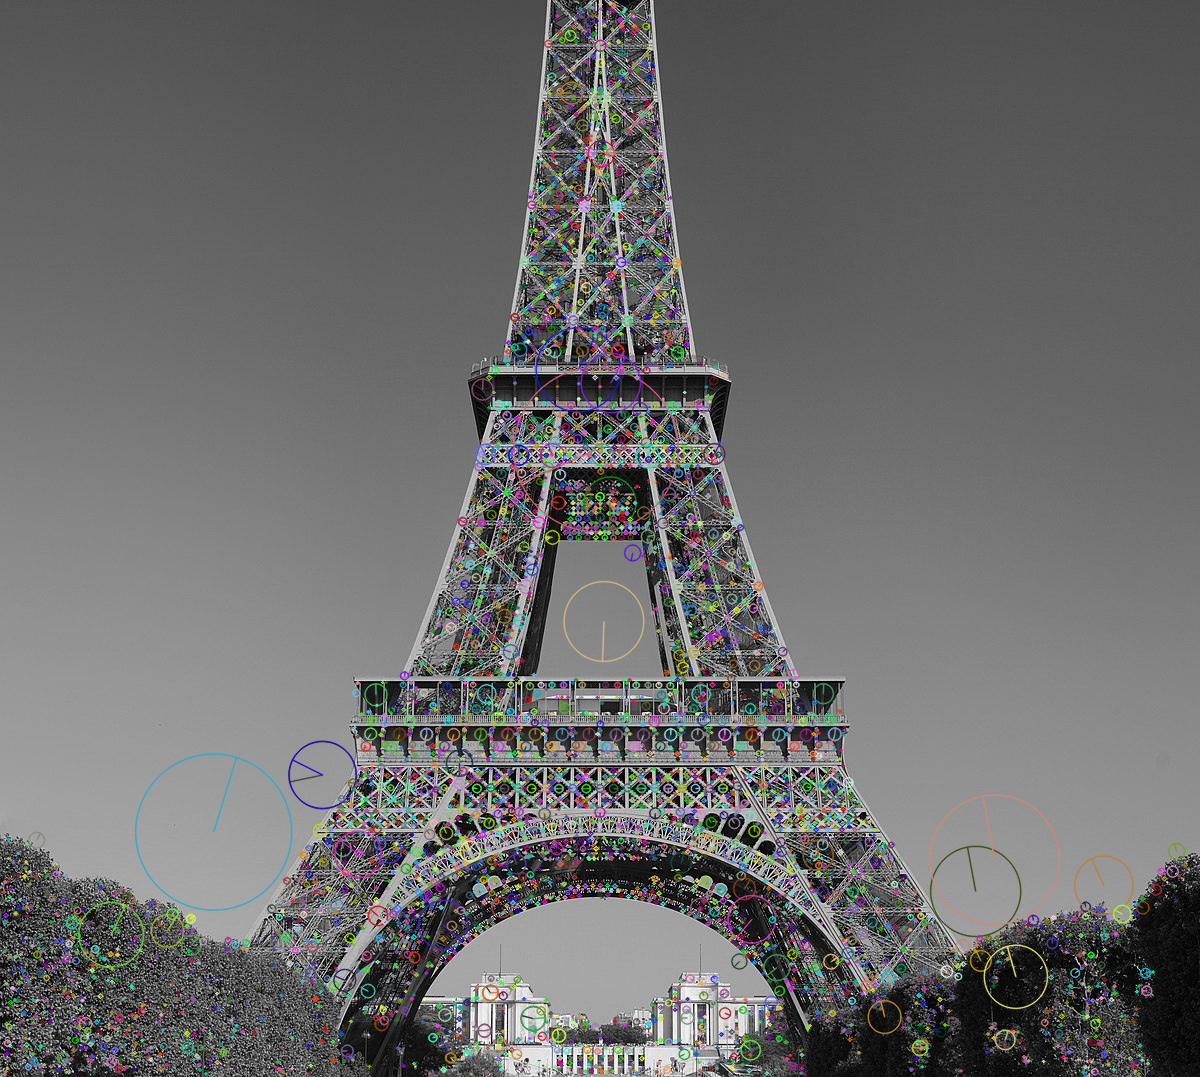

In [9]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img)

## Matching features to a rotated image.


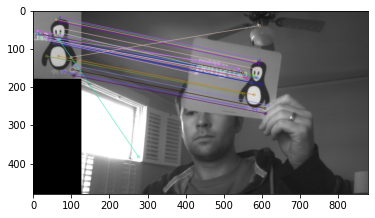

(<matplotlib.image.AxesImage at 0x7ff4a8e04dd0>, None)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2_1.png')  
img2 = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_1.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

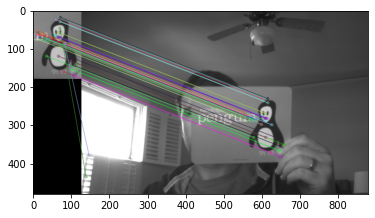

(<matplotlib.image.AxesImage at 0x7ff4a9509e10>, None)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2_1.png')  
img2 = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

Output image with threshold of 1000

## **Harris method on the same image**




Corner Strength Threshold of 1000

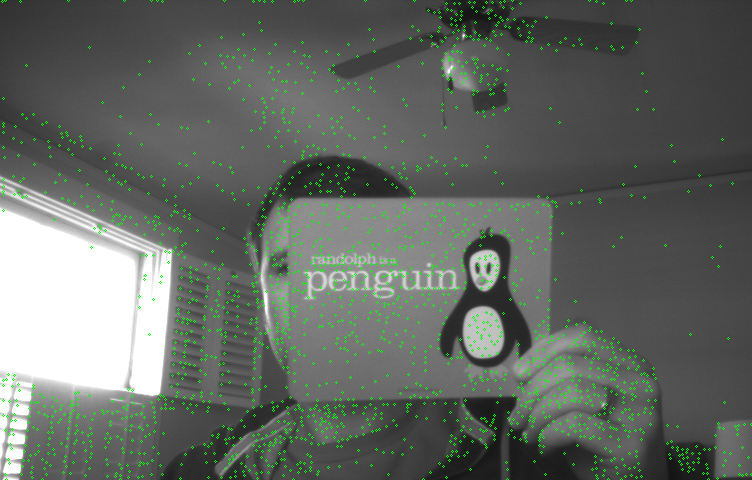

In [26]:
import numpy as np
import cv2
import glob


# Kernel operation using input operator of size 3*3
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d


# Method implements the Harris Corner Detection algorithm
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # # Eliminate the negative values
    # There are multiple ways this can be done
    # 1. Off setting with a positive value (commented out below)
    # 2. Setting negative values to Zero (commented out)
    # 3. Multiply by -1 (implemented below, found most reliable method)
    # ImgX += 128.0
    # ImgY += 128.0
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0

    # # Display the output results after Sobel operations
    # cv2.imshow("SobelX", ImgX)
    # cv2.imshow("SobelY", ImgY)

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    #Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    # print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R


#### Main Program ####

# Get the first image
firstimage = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2.png') 

firstimage = cv2.cvtColor(firstimage, cv2.COLOR_BGR2GRAY)

w, h = firstimage.shape

# Covert image to color to draw colored circles on it
bgr = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)

# Corner detection
R = HarrisCornerDetection(firstimage)

# Empirical Parameter
# This parameter will need tuning based on the use-case
CornerStrengthThreshold = 1000

# Plot detected corners on image
radius = 1
color = (0, 255, 0)  # Green
thickness = 1

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
cv2_imshow(bgr)
outname = "Output_" + str(CornerStrengthThreshold) + ".png"
cv2.imwrite(outname, bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

Corner Strength Threshold of 60000

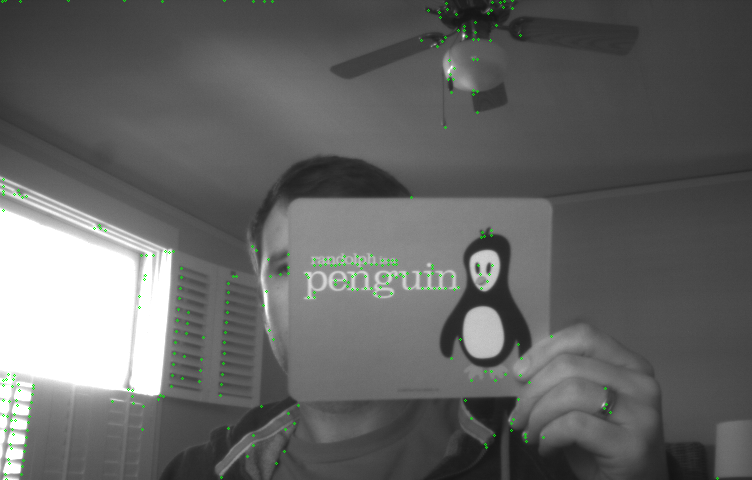

In [19]:
import numpy as np
import cv2
import glob


# Kernel operation using input operator of size 3*3
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d


# Method implements the Harris Corner Detection algorithm
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # # Eliminate the negative values
    # There are multiple ways this can be done
    # 1. Off setting with a positive value (commented out below)
    # 2. Setting negative values to Zero (commented out)
    # 3. Multiply by -1 (implemented below, found most reliable method)
    # ImgX += 128.0
    # ImgY += 128.0
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0

    # # Display the output results after Sobel operations
    # cv2.imshow("SobelX", ImgX)
    # cv2.imshow("SobelY", ImgY)

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    #Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    # print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R


#### Main Program ####

# Get the first image
firstimage = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2.png') 

firstimage = cv2.cvtColor(firstimage, cv2.COLOR_BGR2GRAY)

w, h = firstimage.shape

# Covert image to color to draw colored circles on it
bgr = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)

# Corner detection
R = HarrisCornerDetection(firstimage)

# Empirical Parameter
# This parameter will need tuning based on the use-case
CornerStrengthThreshold = 600000

# Plot detected corners on image
radius = 1
color = (0, 255, 0)  # Green
thickness = 1

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
cv2_imshow(bgr)
outname = "Output_" + str(CornerStrengthThreshold) + ".png"
cv2.imwrite(outname, bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

## **Harris corner implementation with descriptor using window around point of interest.**

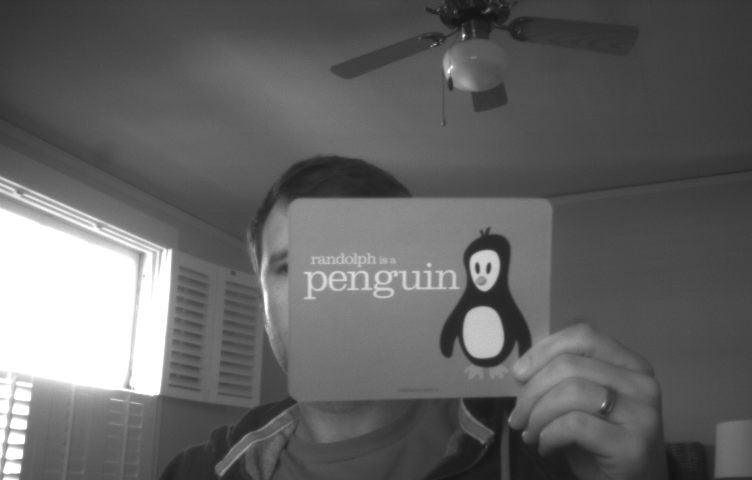

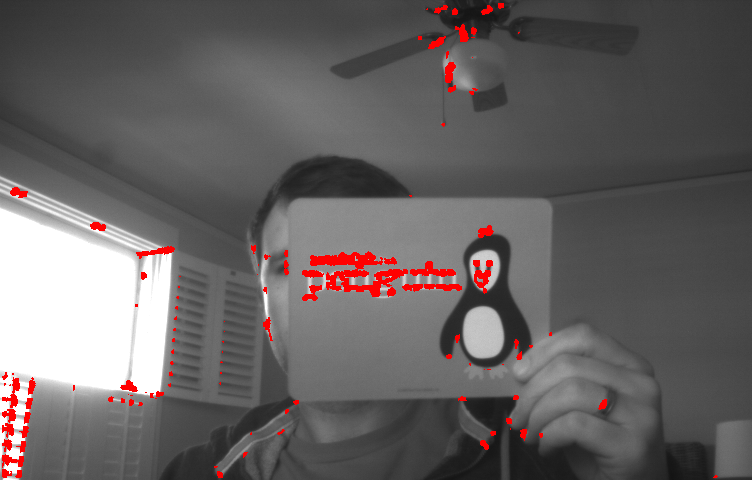

True

In [27]:
import cv2
import numpy as np

def find_harris_corners(input_img, k, window_size, threshold):
  corner_list = []
  output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
  offset = int(window_size/2)
  
  y_range = input_img.shape[0] - offset
  x_range = input_img.shape[1] - offset

  dy, dx = np.gradient(input_img)

  Ixx = dx**2
  Ixy = dy*dx
  Iyy = dy**2
  
  for y in range(offset, y_range):
    for x in range(offset, x_range):
      #Values of sliding window
      start_y = y - offset
      end_y = y + offset + 1
      start_x = x - offset
      end_x = x + offset + 1

      #The variable names are representative to
      #the variable of the Harris corner equation
      windowIxx = Ixx[start_y : end_y, start_x : end_x]
      windowIxy = Ixy[start_y : end_y, start_x : end_x]
      windowIyy = Iyy[start_y : end_y, start_x : end_x]

      #Sum of squares of intensities of partial derevatives
      Sxx = windowIxx.sum()
      Sxy = windowIxy.sum()
      Syy = windowIyy.sum()

      #Calculate determinant and trace of the matrix
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy

      #Calculate r for Harris Corner equation
      r = det - k*(trace**2)

      if r > threshold:
        corner_list.append([x, y, r])
        output_img[y,x] = (0,0,255)
  return corner_list, output_img

k = 0.04
window_size = 4
threshold = 600000

input_img = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2.png',cv2.IMREAD_GRAYSCALE)

cv2_imshow(input_img)

cv2.waitKey(0)

corner_list, corner_img = find_harris_corners(input_img, k, window_size, threshold)

cv2_imshow(corner_img)
cv2.waitKey(0)
cv2.imwrite("corners_img.png", corner_img)

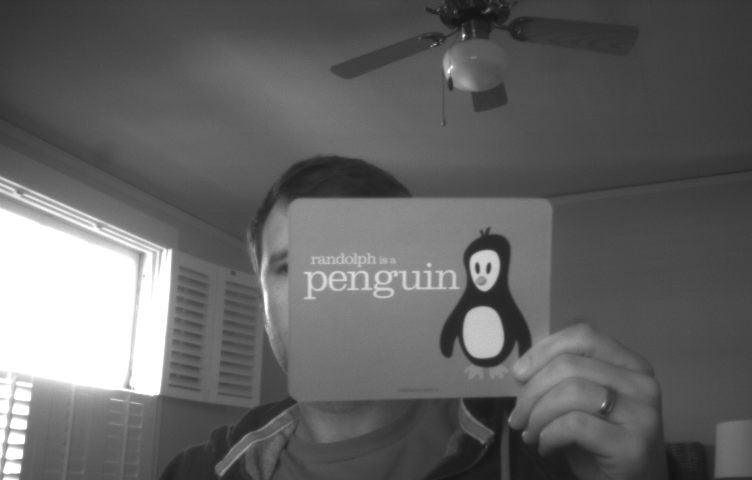

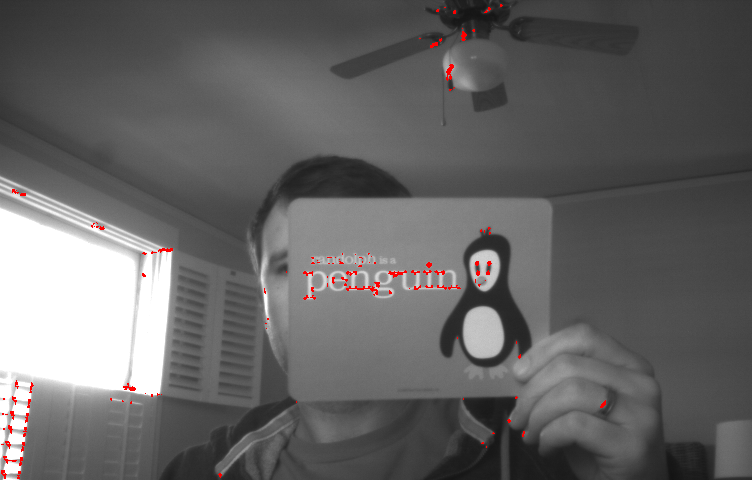

True

In [28]:
import cv2
import numpy as np

def find_harris_corners(input_img, k, window_size, threshold):
  corner_list = []
  output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
  offset = int(window_size/2)
  
  y_range = input_img.shape[0] - offset
  x_range = input_img.shape[1] - offset

  dy, dx = np.gradient(input_img)

  Ixx = dx**2
  Ixy = dy*dx
  Iyy = dy**2
  
  for y in range(offset, y_range):
    for x in range(offset, x_range):
      #Values of sliding window
      start_y = y - offset
      end_y = y + offset + 1
      start_x = x - offset
      end_x = x + offset + 1

      #The variable names are representative to
      #the variable of the Harris corner equation
      windowIxx = Ixx[start_y : end_y, start_x : end_x]
      windowIxy = Ixy[start_y : end_y, start_x : end_x]
      windowIyy = Iyy[start_y : end_y, start_x : end_x]

      #Sum of squares of intensities of partial derevatives
      Sxx = windowIxx.sum()
      Sxy = windowIxy.sum()
      Syy = windowIyy.sum()

      #Calculate determinant and trace of the matrix
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy

      #Calculate r for Harris Corner equation
      r = det - k*(trace**2)

      if r > threshold:
        corner_list.append([x, y, r])
        output_img[y,x] = (0,0,255)
  return corner_list, output_img

k = 0.04
window_size = 3
threshold = 600000

input_img = cv2.imread('/content/drive/MyDrive/CS408_Images/penguin_2.png',cv2.IMREAD_GRAYSCALE)

cv2_imshow(input_img)

cv2.waitKey(0)

corner_list, corner_img = find_harris_corners(input_img, k, window_size, threshold)

cv2_imshow(corner_img)
cv2.waitKey(0)
cv2.imwrite("corners_img.png", corner_img)

##**Matching descriptors**



**Brute-Force Matching with ORB Descriptors**

In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_2_1.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

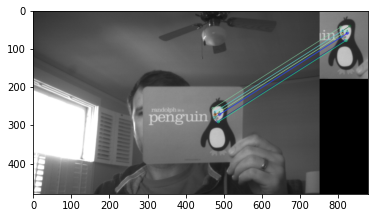

(<matplotlib.image.AxesImage at 0x7ff4a942a0d0>, None)

In [30]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

**Brute-Force Matching with SIFT Descriptors and Ratio Test**

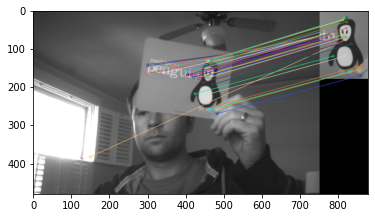

(<matplotlib.image.AxesImage at 0x7ff4a94259d0>, None)

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_2_1.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

**FLANN based Matcher**

In [33]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [34]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

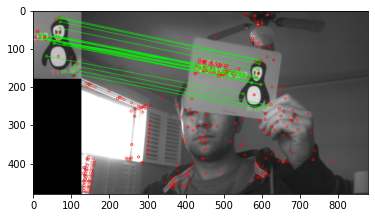

(<matplotlib.image.AxesImage at 0x7ff4a50d14d0>, None)

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img2 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img1 = cv.imread('/content/drive/MyDrive/CS408_Images/penguin_2_1.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

## **Comparison of Harris corner and SIFT**

**Property**-----------------**harris**------------**SIFT**

---


***Time consuming***-----low---------------high

---


***Correctness***------------low---------------high

---


***Robustnes***s------------low----------------high

---

